In [261]:
%run functions.py

In [262]:
import pickle
cl = pickle.load(open( "pickles/cl.p", "rb" ) )
clusters = pickle.load( open( "pickles/clusters.p", "rb" ) )
categs = pickle.load( open( "pickles/categs.p", "rb" ) )
colors = pickle.load(open( "pickles/colors.p", "rb" ) )
df = pickle.load(open( "pickles/df.p", "rb" ) )
dflabel = pickle.load(open( "pickles/dflabel.p", "rb" ) )

In [263]:
#remove address (string) from analysis
data = df.iloc[:,1:]

In [264]:
log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
scale = StandardScaler()
num_features = data.shape[1]
pca =PCA(n_components=num_features)


#build pipeline
pipe = Pipeline([('log', log ),
                 ('scale', scale ),
                 ('PCA', pca)])

results = pipe.fit_transform(data)



In [265]:
c = cl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
df_summary = pd.DataFrame(centroids, columns = data.columns, index=np.unique(cl.labels_))

In [266]:
#put cluster sizes into summary dataframe
cluster_sizes = pd.Series(cl.labels_).value_counts()
df_summary['cluster_size'] = cluster_sizes

In [267]:
cluster_sizes

4      10638
1      10600
0       4733
3       4145
2       3764
7        930
5        399
100      336
101      208
102      164
dtype: int64

In [268]:
df_summary.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
df_summary

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
4,10.148004,11.439487,272.061019,28.011880,1.176285e+05,11909.603485,494.950977,44.898626,1.415665e+05,12695.374345,...,9344.715804,0.004589,0.011957,1.408514e+06,2.209451e+06,1.767007e+06,2.572581e+06,13.684745,154.786280,10638
1,7.078526,9.795100,23.249525,3.830997,8.762302e+03,1291.355465,105.442013,11.464147,3.089142e+04,3234.629383,...,2131.144993,0.008231,0.019847,1.584217e+06,2.282661e+06,1.907430e+06,2.512053e+06,11.675174,69.215890,10600
0,10.922450,167.311172,49.595416,5.309296,2.060199e+04,1951.469425,141.314459,1.225539,4.896905e+04,298.763612,...,3597.318070,0.006736,0.012918,9.266319e+04,8.458505e+04,1.431985e+06,1.813041e+06,9.900482,70.278387,4733
3,16.729698,19.211097,4035.595983,249.381973,1.677591e+06,103356.414433,6093.813915,329.689816,1.931300e+06,104106.268106,...,147734.064391,0.006899,0.021373,6.328530e+05,1.141147e+06,1.034699e+06,1.663846e+06,15.116149,766.200135,4145
2,44.661727,75.842801,874.695246,21.044079,3.675337e+05,8386.495536,1081.065687,15.451096,4.468384e+05,5996.488812,...,45470.602178,0.002026,0.005567,1.821640e+05,3.413101e+05,3.515459e+05,6.414752e+05,11.880519,118.706655,3764
7,5.080609,8.841778,23.378613,6.509476,5.839765e+03,1321.628524,191.734114,23.741661,5.691868e+04,6689.045643,...,4367.416143,0.005980,0.017726,3.507871e+05,5.088572e+05,2.562649e+03,1.956605e+03,8.918213,125.939100,930
5,64.394046,42.600056,676.494503,13.666325,1.811183e+05,2956.806565,632.647059,18.065319,1.381736e+05,3411.937669,...,8636.353323,5.266321,163.286974,6.015009e+05,1.221349e+06,4.320148e+05,9.418116e+05,21.262606,147.902840,399
100,4.907633,10.787804,40.408423,9.142876,1.500748e+04,3013.646429,149.423213,16.395184,3.845625e+04,3666.956122,...,2446.791291,0.037120,0.063605,1.385210e+06,1.864186e+06,2.712644e+06,3.350247e+06,11.977043,93.358870,336
101,34.232732,68.626248,162.912839,6.000102,6.504092e+04,2060.615477,360.116350,7.025399,1.634050e+05,2489.256003,...,16400.943373,0.006389,0.062052,1.395494e+05,1.890620e+05,2.079628e+05,3.233875e+05,9.795184,89.339718,208
102,24.466139,25.494219,3390.068221,131.457211,1.568881e+06,65342.868918,3802.201561,144.395068,1.087081e+06,44230.062320,...,70359.211601,0.031947,0.118852,9.709672e+05,2.130806e+06,1.123228e+06,2.076129e+06,18.525349,423.320408,164


## Radar Plot

In [269]:
df_radar = df_summary

In [270]:
df_radar['label'] = df_radar.index

In [271]:
df_radar = df_radar.reset_index()

In [272]:
df_radar.set_index('label', inplace=True)

In [273]:
df_radar[df_radar<0] = 0

In [274]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [275]:
#log scale
df_radar = np.log1p(df_radar)+1

In [276]:
df_radar

,index,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
label,,,,,,,,,,,,,,,,,,,,,
4,2.609438,3.411260,3.520876,6.609695,4.367705,12.675296,10.385184,7.206477,4.826435,12.860532,...,10.142673,1.004578,1.011886,15.158046,1.943377,15.384798,1.898492,3.686809,6.048485,10.272282
1,1.693147,3.089209,3.379092,4.188397,2.575053,10.078328,8.164222,5.667600,3.522856,11.338266,...,8.664884,1.008197,1.019653,15.275601,1.892357,15.461268,1.840266,3.539645,5.251575,10.268704
0,1.000000,3.478423,6.125814,4.923861,2.842024,10.933192,8.576850,5.958039,1.799999,11.798964,...,9.188222,1.006713,1.012835,12.436737,1.648580,15.174573,1.818062,3.388807,5.266593,9.462526
3,2.386294,3.875241,4.006232,9.303157,6.522988,15.332870,12.545948,9.715194,6.801181,15.473704,...,12.903176,1.006876,1.021148,14.357995,2.030754,14.849622,1.958603,3.779822,7.642748,9.329899
2,2.098612,4.821260,5.341762,7.775018,4.093044,13.814573,10.034497,7.986627,3.800392,14.009955,...,11.724843,1.002024,1.005552,13.112668,2.055580,13.770098,2.038412,3.555716,5.785044,9.233503
7,3.079442,2.805105,3.286636,4.193706,3.016166,9.672617,8.187376,6.261312,4.208488,11.949396,...,9.382156,1.005963,1.017571,13.767938,1.896339,8.849187,1.567305,3.294373,5.843707,7.836259
5,2.791759,5.180431,4.775058,7.518401,3.685554,13.106911,8.992203,7.451492,3.947871,12.836274,...,10.063851,2.835189,6.101615,14.307185,2.108729,13.976217,2.156895,4.102908,6.003294,6.991465
100,5.615121,2.776245,3.467065,4.723484,3.316772,10.616370,9.011238,6.013453,3.856193,11.557302,...,8.802941,1.036447,1.061664,15.141363,1.852617,15.813435,1.804263,3.563182,5.547105,6.820083
101,5.624973,4.561976,5.243142,6.099335,2.945925,12.082787,8.631245,6.889200,3.082611,13.003993,...,10.705155,1.006369,1.060203,12.846181,1.856457,13.245119,1.938062,3.379100,5.503577,6.342334


In [277]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [278]:
ls = list(df_radar)[1:-1]

In [279]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent','avg_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [280]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}

In [281]:
d

{'outgoing_txns': 'A',
 'outgoing_avg_time_btwn_txns': 'B',
 'outgoing_std_time_btwn_txns': 'C',
 'total_usd_sent': 'D',
 'avg_usd_sent': 'E',
 'incoming_txns': 'F',
 'incoming_avg_time_btwn_txns': 'G',
 'incoming_std_time_btwn_txns': 'H',
 'total_usd_recd': 'I',
 'contracts_created': 'J',
 'contract_txns_sent': 'K',
 'eth_balance': 'L',
 'num_tokens_used': 'M'}

In [282]:
dfr = df_radar[feats]

In [283]:
#setting up color map
NUM_COLORS = cl.n_clusters
cmp = plt.get_cmap('viridis', 12)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


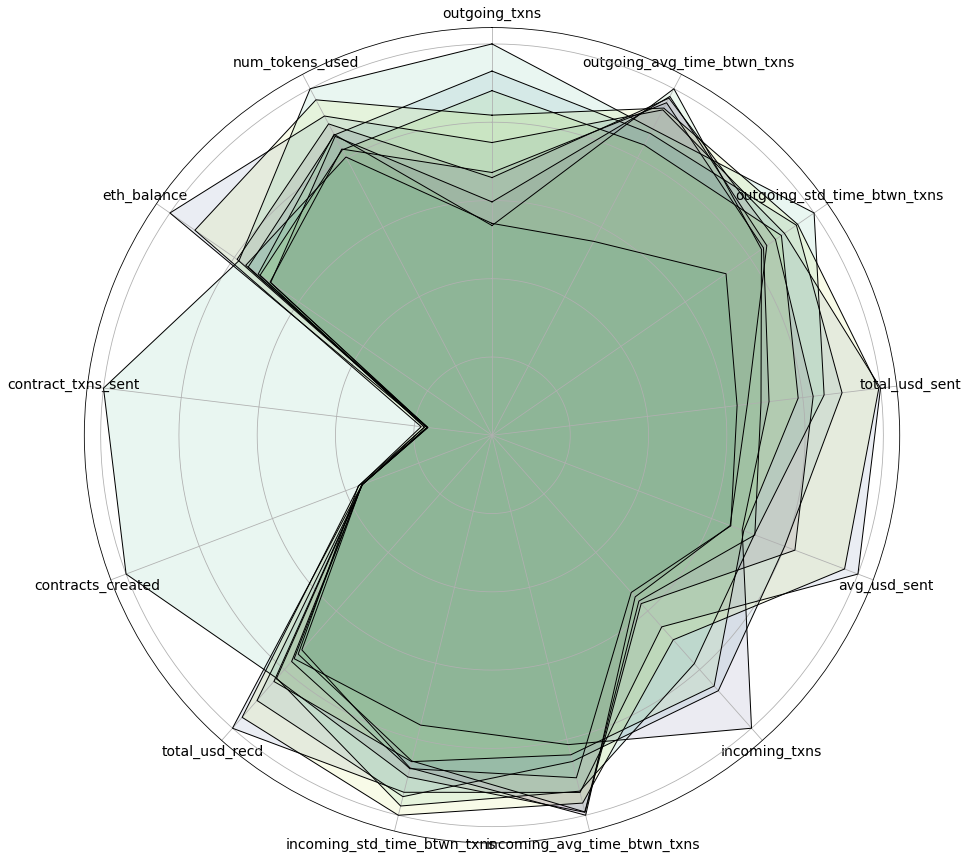

In [284]:
# Libraries
from math import pi

 
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(dfr)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_color_cycle([cmp(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(10):
    # Ind1
    lbl = df_radar.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='k', label=lbl)
    ax.fill(angles, values, alpha=0.1)
 
 
# # Add legend
# plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))

In [285]:
total_eth = {}
total_addresses = {}

for clust in np.unique(cl.labels_):
    mask = cl.labels_==clust
    eth = np.sum(df[mask]['eth_balance'])
    size = np.sum(cl.labels_==clust)
    total_eth[clust] = eth
    total_addresses[clust] = size

In [286]:

names = np.array(list(total_eth.keys()))
values = np.array(list(total_eth.values()))
indices = np.argsort(values)

names = names[indices][::-1]
values = values[indices][::-1]

In [287]:
names
dfr=dfr.loc[names]

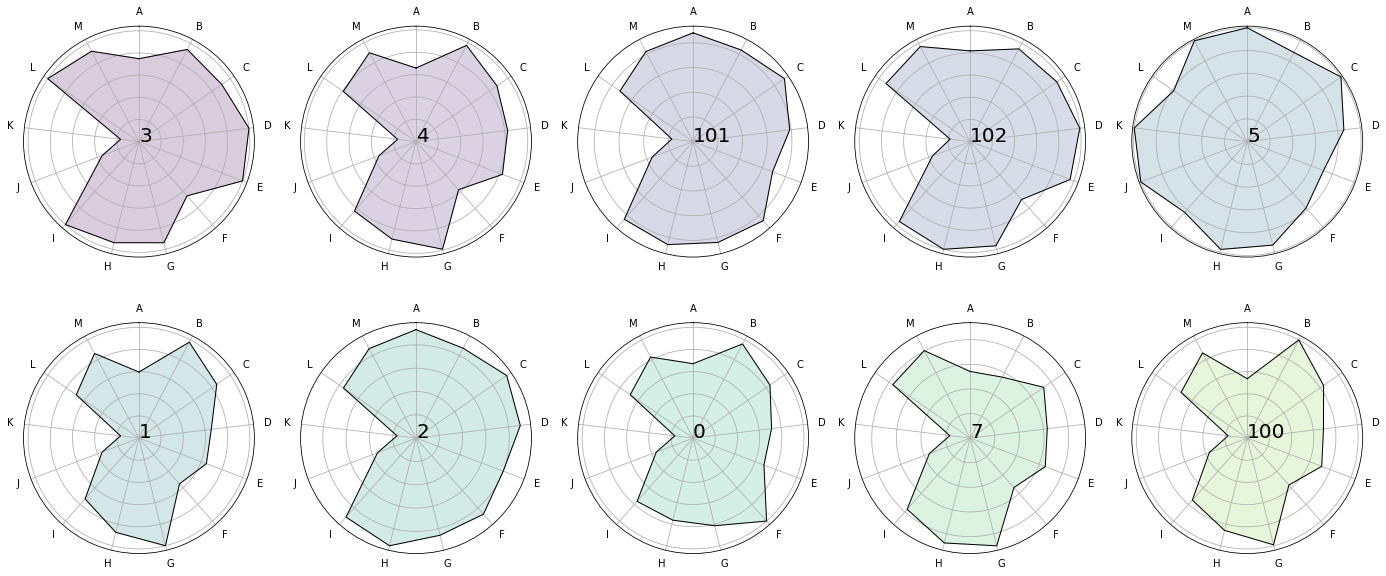

In [288]:
import matplotlib as mpl

from pylab import *

fig = plt.figure(figsize=(24,10))
# ------- PART 1: Create background

# number of variable
categories=list(dfr)
categories=list(d.values())
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i,c in enumerate(names):
    rgb = cmp(i)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    ax = plt.subplot(2,5,i+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.xticks(fontsize=10)
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)
    ax.set_yticklabels([])
     #hide labels
#     ax.set_xticklabels([])
 
# # Plot each individual = each line of the data
 

    lbl = dfr.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2,c=rgb, label=lbl)
 
    ax.text(1,0, str(lbl), fontsize=20)


In [289]:
dfdf = pd.DataFrame(pd.Series(d))

In [290]:
dfdf.sort_values(by=0)

,0
outgoing_txns,A
outgoing_avg_time_btwn_txns,B
outgoing_std_time_btwn_txns,C
total_usd_sent,D
avg_usd_sent,E
incoming_txns,F
incoming_avg_time_btwn_txns,G
incoming_std_time_btwn_txns,H
total_usd_recd,I
contracts_created,J


In [291]:
names

array([  3,   4, 101, 102,   5,   1,   2,   0,   7, 100], dtype=int32)

In [292]:
dftest=df_summary.loc[names]

In [293]:
dftest=dftest[dftest.columns[:-2]]

In [294]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [295]:
cos_sim = cosine_similarity(dftest)

In [296]:
idxs = np.argsort(cos_sim[-1])

In [297]:
test = cos_sim[idxs]

In [298]:
lbls = dftest.index[idxs]

In [299]:
lbls

Int64Index([7, 3, 2, 102, 5, 0, 101, 1, 4, 100], dtype='int64')

In [300]:
cmap=cm.get_cmap('YlGnBu')

In [301]:
from matplotlib.colors import LogNorm, PowerNorm

Text(114,0.5,'Cluster Number')

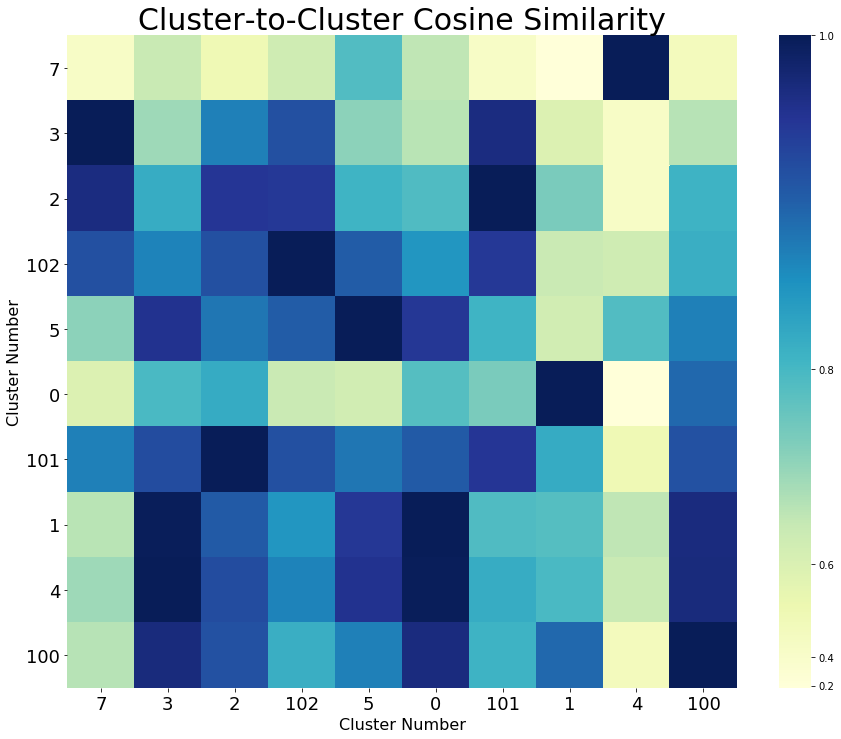

In [302]:
fig = plt.figure(figsize=(15,12))

# sns.heatmap(cos_sim,xticklabels=dftest.index, cmap=cm.get_cmap('Blues'),yticklabels=dftest.index, cbar=False)
sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=3))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=0)
plt.xlabel("Cluster Number", fontsize=16)
plt.ylabel("Cluster Number", fontsize=16)

In [303]:
dftest2 = dftest.loc[lbls]

In [304]:
cos_sim=cosine_similarity(dftest2)

In [305]:
test=cos_sim

In [306]:
test.shape

(10, 10)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

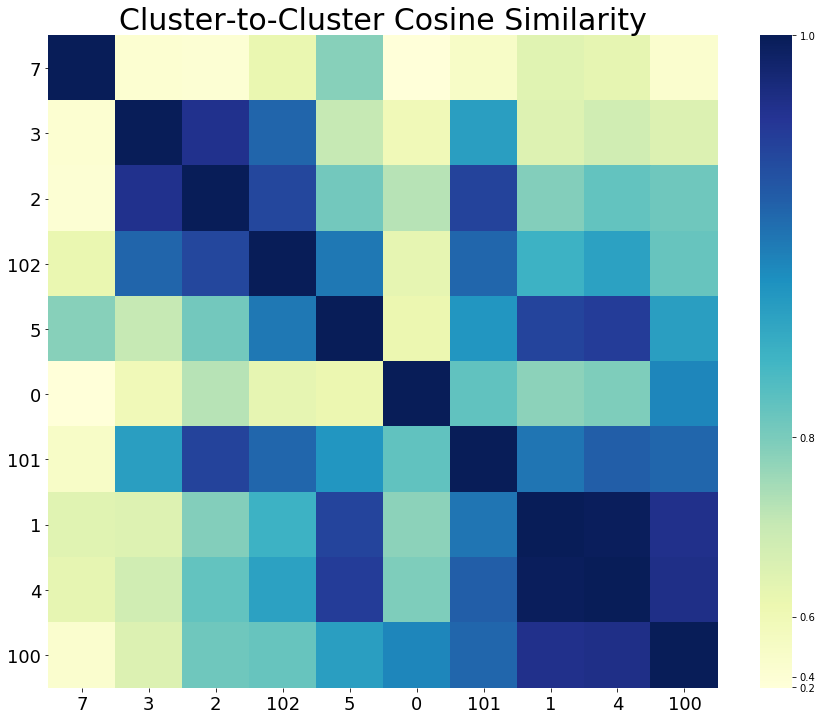

In [308]:
fig = plt.figure(figsize=(15,12))

sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=4))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=0)



In [309]:
from sklearn.cluster import AgglomerativeClustering

In [310]:
ag = AgglomerativeClustering(n_clusters=8)

In [311]:
c = cl.cluster_centers_
df_scaled = pd.DataFrame(c, columns = data.columns, index=np.unique(cl.labels_))

In [312]:
df_scaled

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance
0,-1.795478,2.671110,0.565756,-1.454970,0.536982,0.118183,0.146585,-0.201770,-0.073037,0.003327,...,-0.036298,-0.033641,0.045094,0.045631,-0.020244,-0.000686,0.000994,-0.000355,0.000098,7.766075e-04
1,-2.837739,-0.336182,-0.082736,0.317779,-0.235123,-0.060728,-0.263878,0.102557,0.039112,0.010909,...,0.007886,0.012208,-0.028878,-0.014395,0.009556,0.005767,-0.000999,0.000867,-0.001508,-5.615647e-04
2,2.491108,1.673460,-0.309876,-0.156230,-0.128276,-0.486433,-0.044756,0.181724,0.011266,-0.013200,...,0.054264,0.012852,-0.029773,-0.029705,0.004708,-0.005628,-0.000472,0.000896,0.001508,4.397024e-04
3,4.916620,-1.990816,-0.250462,-0.360534,0.238184,0.370616,-0.089972,-0.180707,-0.017132,-0.037148,...,-0.006331,-0.012744,-0.008965,0.066768,0.010444,0.008689,0.000060,-0.001639,-0.001338,-8.964231e-04
4,0.299605,-1.309731,0.101420,-0.017875,-0.096916,-0.144784,0.082595,0.084946,0.030475,0.038987,...,0.002138,-0.000611,0.026863,-0.016684,-0.006974,-0.007314,0.000312,-0.000793,0.001636,3.976044e-04
5,1.401975,1.682950,4.564641,6.831413,6.692854,0.070106,-0.117268,0.053482,-0.438336,-0.097233,...,0.019619,-0.009349,0.008229,-0.006504,0.005452,0.003991,-0.000755,-0.001223,-0.000843,-9.330907e-04
7,-1.376560,1.579738,-2.877479,2.415291,-0.936163,2.082850,2.563018,-1.201209,-0.770588,-0.278463,...,-0.048953,0.017769,0.006860,-0.005520,0.011576,-0.003199,0.003919,0.006064,0.001211,-3.969497e-05
100,-2.289744,-0.850755,0.175093,-0.082661,0.146885,0.080197,-0.020875,-0.036749,-0.012255,-0.010219,...,-0.000826,-0.002475,-0.001251,-0.001088,-0.000070,-0.000048,0.000047,-0.000030,0.000009,5.076691e-07
101,0.486070,2.577537,-0.668577,0.188850,-0.148668,-0.041307,0.056496,0.132195,0.044752,0.028353,...,0.005209,0.004277,0.002171,0.001564,-0.000939,-0.000711,-0.000095,-0.000156,-0.000052,-4.402568e-06
102,4.074705,-1.526062,0.489225,-0.070163,-0.112381,-0.111917,-0.028885,-0.092371,-0.031651,-0.015023,...,-0.004914,-0.000354,-0.000190,0.000247,0.001335,0.001000,0.000024,0.000259,0.000047,4.543642e-06


In [313]:
fitag = ag.fit(dftest)

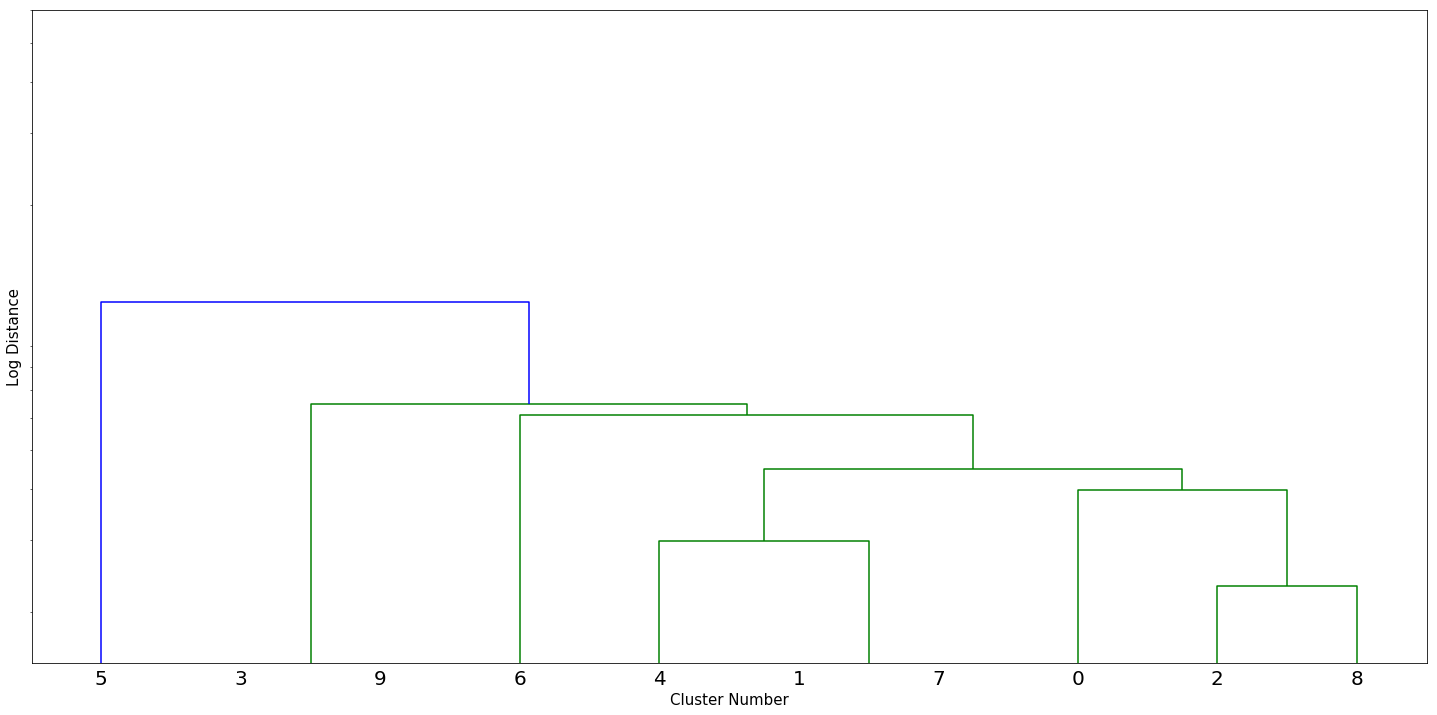

In [314]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled, method='average',metric='euclidean')
fig=plt.figure(figsize=(25,12))
dendrogram(Z,color_threshold=8) 
# plt.ylim(0,1e8)
plt.yscale('log')
plt.ylim(1.5,60)
# plt.title("Cluster Dendrogram", fontsize=30)
plt.ylabel('Log Distance', fontsize=15)
plt.yticks([])
plt.xlabel("Cluster Number", fontsize=15)
plt.xticks(fontsize=20, rotation='horizontal')
plt.show()

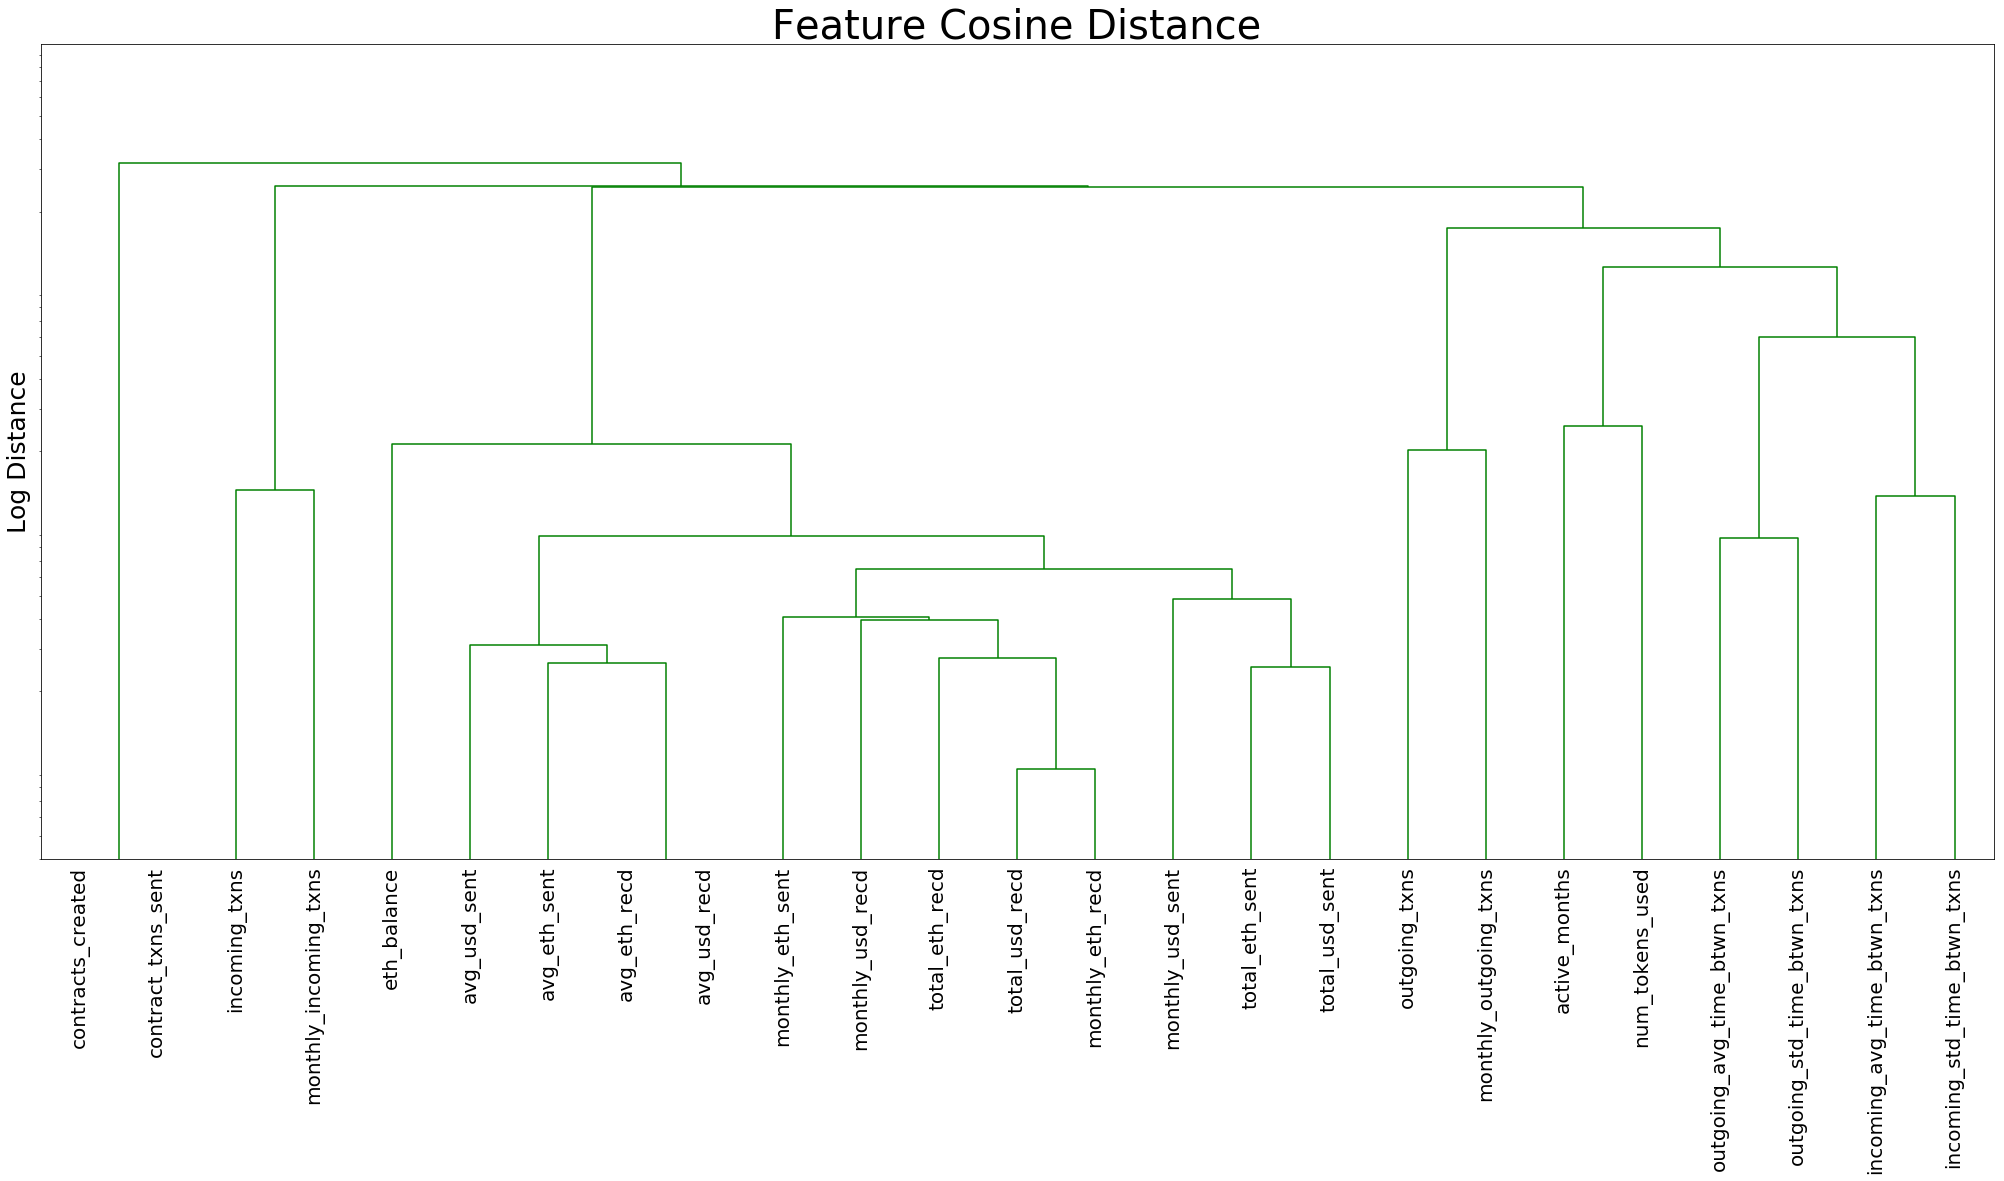

In [218]:

Z = linkage(dftest.T, metric='cosine')
fig=plt.figure(figsize=(35,15))
dendrogram(Z,labels=dftest.columns, color_threshold=.4) 
# plt.ylim(0,1e8)
plt.yscale('log')
plt.ylim(.0004,1)
plt.title("Feature Cosine Distance", fontsize=40)
plt.ylabel('Log Distance', fontsize=25)
plt.yticks([])

plt.xticks(fontsize=20, rotation='vertical')
plt.show()

In [315]:
df_summary.columns[8]

'total_usd_recd'

In [316]:
df_radar = df_summary#.loc[list(clusters)]

In [317]:
df_radar['label'] = df_radar.index

In [318]:
df_radar = df_radar.reset_index()

In [319]:
df_radar.set_index('label', inplace=True)

In [320]:
df_radar[df_radar<0] = 0

In [321]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [322]:
#log scale
df_radar = np.log1p(df_radar)+1

label with my name for category
round negative results in summary to zero


In [323]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [324]:
list(df_radar)[1:-1]

['outgoing_txns',
 'incoming_txns',
 'total_eth_sent',
 'avg_eth_sent',
 'total_usd_sent',
 'avg_usd_sent',
 'total_eth_recd',
 'avg_eth_recd',
 'total_usd_recd',
 'avg_usd_recd',
 'active_months',
 'monthly_outgoing_txns',
 'monthly_incoming_txns',
 'monthly_eth_sent',
 'monthly_usd_sent',
 'monthly_eth_recd',
 'monthly_usd_recd',
 'contracts_created',
 'contract_txns_sent',
 'incoming_avg_time_btwn_txns',
 'incoming_std_time_btwn_txns',
 'outgoing_avg_time_btwn_txns',
 'outgoing_std_time_btwn_txns',
 'num_tokens_used',
 'eth_balance']

In [325]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [326]:
df_radar = df_radar[feats]

In [231]:
df_radar = df_radar.loc[list(clusters)]

In [336]:
colors = ('green','orange','blue')
categ = ('Exchanges', 'Mining', 'ICO Wallets')

In [331]:
d = dict(zip(categ, df_radar.index))

In [332]:
lbls = list(d.keys())
cats = list(d.values())

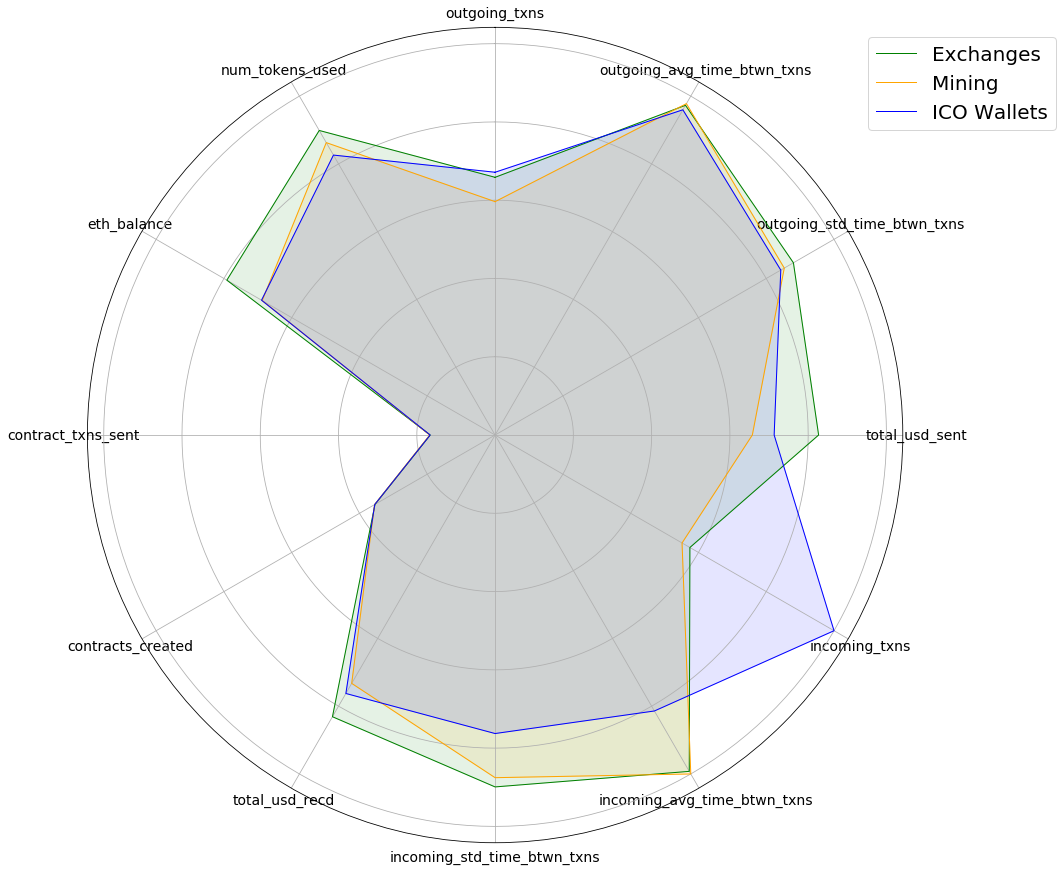

In [337]:

fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(3):
    # Ind1
    lbl = lbls[i]
    values=df_radar.loc[cats[i]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, c=colors[i],linestyle='solid', label=lbl)
    ax.fill(angles, values, c=colors[i], alpha=0.1)
 
 
# Add legend
plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))